<a href="https://colab.research.google.com/github/larissasant/Exemplo_usando_Tensorflow/blob/master/Exemplo_usando_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# Base de dados
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# Explorando Dados
train_images.shape

(60000, 28, 28)

In [0]:
# Existem 60000 labels no conjunto de treinamento
len(train_labels)

60000

In [0]:
# Cada label é um inteiro entre 0 e 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# Existem 10000 imagens no conjnto de teste. Novamente, cada imagem é representada por 28 x 28 pixels
test_images.shape

(10000, 28, 28)

In [0]:
# E um conjunto de teste contendo 10000 labels das imagens 
len(test_labels)

10000

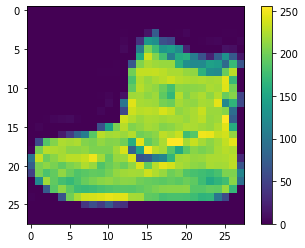

In [0]:
# Pre processa os dados
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Dividindos os valores por 255
train_images = train_images / 255.0

test_images = test_images / 255.0

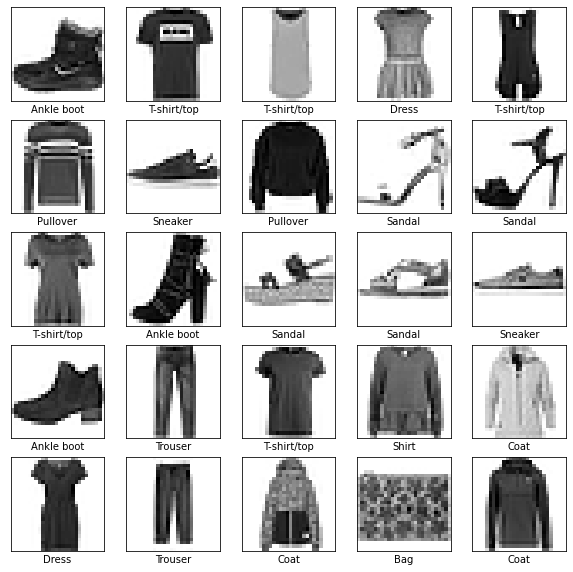

In [0]:
# Verifica os dados se estão corretos

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Camadas

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #primeira camada, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels)
    keras.layers.Dense(128, activation='relu'), # segunda camada, tem 128 nós (ou neurônios)
    keras.layers.Dense(10, activation='softmax') # terceira camada, 10 nós que retorna um array de 10 probabilidades
])

In [0]:
model.compile(optimizer='adam', # Isso é como o modelo se atualiza com base no dado
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Usadas para monitorar os passos de treinamento e teste

In [0]:
# Treine o modelo

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.1214 - accuracy: 0.6436
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6540 - accuracy: 0.7641
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5769 - accuracy: 0.7922
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5334 - accuracy: 0.8112
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5041 - accuracy: 0.8224
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4823 - accuracy: 0.8302
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4659 - accuracy: 0.8362
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4532 - accuracy: 0.8413
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4425 - accuracy: 0.8443
Epoch 10/10
60

In [0]:
# Avalia a Acuracia

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.4597 - accuracy: 0.8343

Test accuracy: 0.8343


In [0]:
# Faz previsões
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([4.75445290e-07, 2.65670863e-08, 2.88654041e-06, 5.27743850e-06,
       8.75334263e-06, 1.13752574e-01, 8.94722507e-06, 3.39669436e-01,
       4.35578963e-03, 5.42195857e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
# Mostrando graficamente

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


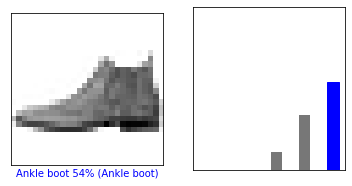

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

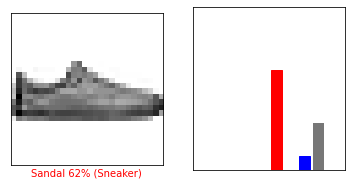

In [0]:

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

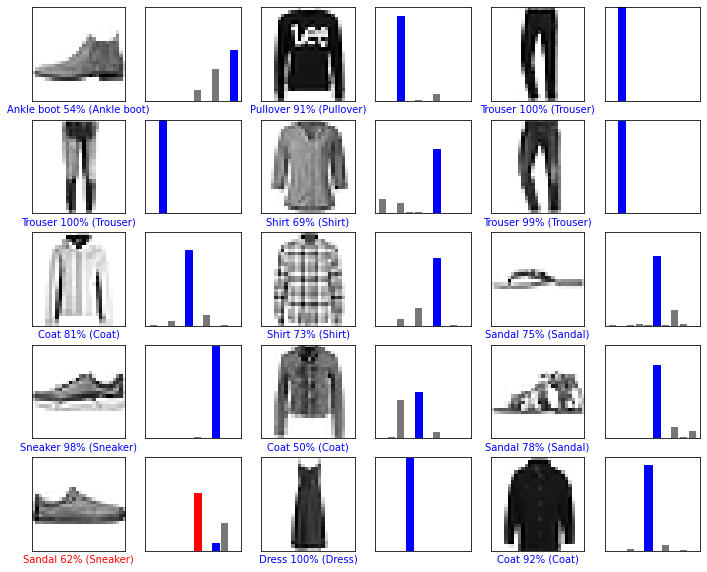

In [0]:
# Cores como previsões corretas serão azul e incorretas vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# Peguei uma imagem do conjunto de dados de teste
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# Adiciona uma imagem em um lote que possui um único membro
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
# Agora pedimos label correta
predictions_single = model.predict(img)

print(predictions_single)

[[4.75446200e-07 2.65670863e-08 2.88654041e-06 5.27743850e-06
  8.75334263e-06 1.13752514e-01 8.94722507e-06 3.39669496e-01
  4.35579149e-03 5.42195857e-01]]


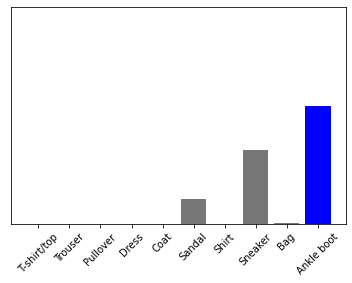

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

9